<a href="https://colab.research.google.com/github/Ramki-Rks/Hotel_Booking_Capstone_Project/blob/main/Colab_NoteBooks_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import required library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load the data file
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Exploratory Data analysis-Capstone Project/Hotel Bookings.csv')

In [ ]:
#cheking first 5 datas using head() function
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:

#get last 5 rows using tail function
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# with help of the shape() function we can find numberr of column and rows
df.shape

(119390, 32)

In [ ]:
#looking all column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Cleaning the given data  like droping NaN values, unwanded columns or rows, replacing any values to Nan values present in coumn, etc

In [ ]:
#using info() function we see type of Data Type presernt in given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Finding the number of Null value present in each column
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

##Here agent and company have huge number of NaN values present there in our dataframe. so we will drop those two coulmn and remove nan value present in the country column across the rows

In [ ]:
#removing the agent and company column
df.drop(columns=['agent','company'], inplace=True)

In [ ]:
#drop the rows which is have Null values
df.dropna(axis=0,inplace=True)    

In [ ]:
#check the number of rows and columns
df.shape

(118898, 30)

## Now we have 118898 rows and 30 columns. so we can start our analaysis

In [ ]:
#find the number of resort and city hotels there is our data
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

##Draw the pie chart by using hotel columns and normalize the value 

Text(0.5, 1.0, 'Percentage of Hotel Used')

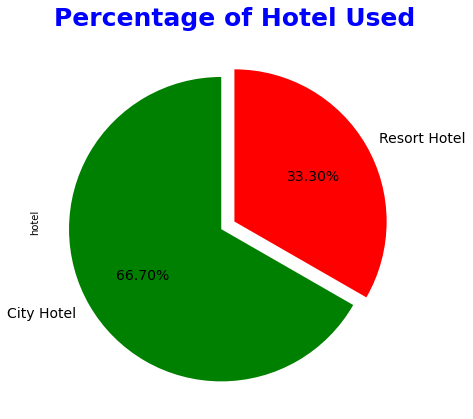

In [ ]:
#use normalize option to normalize overall value and categories the hotels
count_of_hotels=df['hotel'].value_counts(normalize=True)
count_of_hotels.plot(kind='pie', autopct='%1.2f%%',explode = (0.1,0),startangle=90,figsize = (12,7),colors = ['green','red'],fontsize = 14)
plt.title('Percentage of Hotel Used', fontsize=25, color='Blue',fontweight="bold")

Conclusion:-

most if the visitors prefered city Based hotel with 66.67%

##Next find the how many adults,babies,children used in each type of hotels

In [ ]:
#use groupby find number of adults went each type of hotel
number_adults_each_hotel = df.groupby(['hotel']).adults.sum()

number_adults_each_hotel


hotel
City Hotel      146798
Resort Hotel     74161
Name: adults, dtype: int64

Text(0.5, 1.0, 'Number of Adults in Each Hotel ')

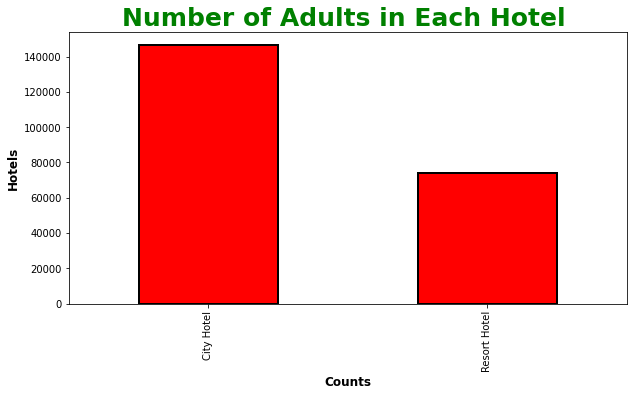

In [ ]:
#plotting the bar chart using matplotlib library to find no.of adults used in each hotel
number_adults_each_hotel.plot(kind='bar', fontsize=10,edgecolor='black',figsize=(10,5),color='red',linewidth=2)
plt.xlabel('Counts',fontsize=12,fontweight='bold')
plt.ylabel('Hotels',fontsize=12,fontweight='bold')
plt.title('Number of Adults in Each Hotel ',fontsize=25,fontweight='bold', color='green')

In [ ]:
#use groupby, find number of children went to each type of hotel
number_children_each_hotel = df.groupby(['hotel']).children.sum()

number_children_each_hotel


hotel
City Hotel      7248.0
Resort Hotel    5142.0
Name: children, dtype: float64

Text(0.5, 1.0, 'Number of Children in Each Hotel ')

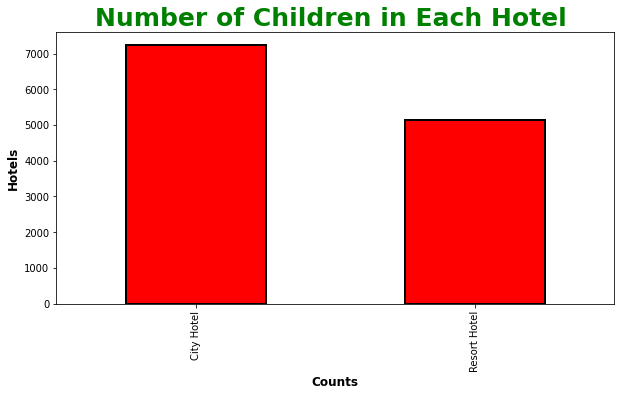

In [ ]:
#plotting the bar chart using matplotlib library to find no.of children used in each hotel
number_children_each_hotel.plot(kind='bar', fontsize=10,edgecolor='black',figsize=(10,5),color='red',linewidth=2)
plt.xlabel('Counts',fontsize=12,fontweight='bold')
plt.ylabel('Hotels',fontsize=12,fontweight='bold')
plt.title('Number of Children in Each Hotel ',fontsize=25,fontweight='bold', color='green')

In [ ]:
#use groupby find number of babies went each type of hotel
number_babies_each_hotel = df.groupby(['hotel']).babies.sum()

number_babies_each_hotel


hotel
City Hotel      392
Resort Hotel    553
Name: babies, dtype: int64

Text(0.5, 1.0, 'Number of Babies in Each Hotel ')

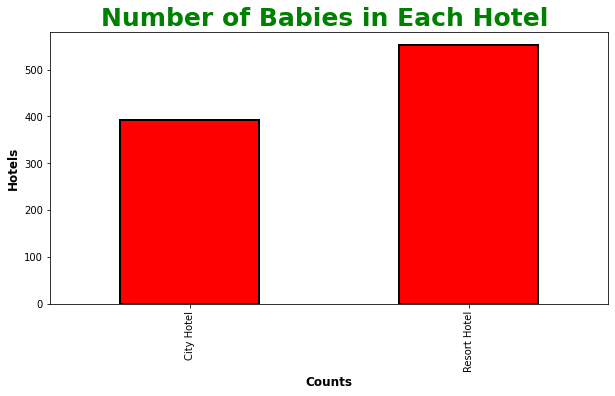

In [ ]:
#plotting the bar chart using matplotlib library to find no.of babies used in each hotel
number_babies_each_hotel.plot(kind='bar', fontsize=10,edgecolor='black',figsize=(10,5),color='red',linewidth=2)
plt.xlabel('Counts',fontsize=12,fontweight='bold')
plt.ylabel('Hotels',fontsize=12,fontweight='bold')
plt.title('Number of Babies in Each Hotel ',fontsize=25,fontweight='bold', color='green')

##Conclusion:-

*Based on above analysis thee results says that when large family/ with babies better we have to choose resort based hotel.suppose if family with children and adults there then we can choose city hotels*

## Type of room used in each categories of hotel

In [ ]:
#with groupby function to fid the no.of visitors used on each categories of rooms
dff=df.groupby(['hotel','assigned_room_type']).assigned_room_type.count().unstack()
dff

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
hotel,,,,,,,,,,,,
City Hotel,56991.0,2000.0,161.0,14983.0,2168.0,2018.0,700.0,NaN,NaN,279.0,NaN,2.0
Resort Hotel,16872.0,159.0,2193.0,10183.0,5570.0,1714.0,1839.0,708.0,357.0,NaN,1.0,NaN


##Conclusion:-
Most of visitors try to get A type room in both city and resort based hotels

##No of arrival in each year

In [ ]:
#year wise arrival in each hotel
arrival_list =df.groupby(['hotel', 'arrival_date_year' ]).hotel.count().unstack()
arrival_list



arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,13663,38135,27504
Resort Hotel,8196,18300,13100


Text(0.5, 1.0, 'Year Wise Arrival')

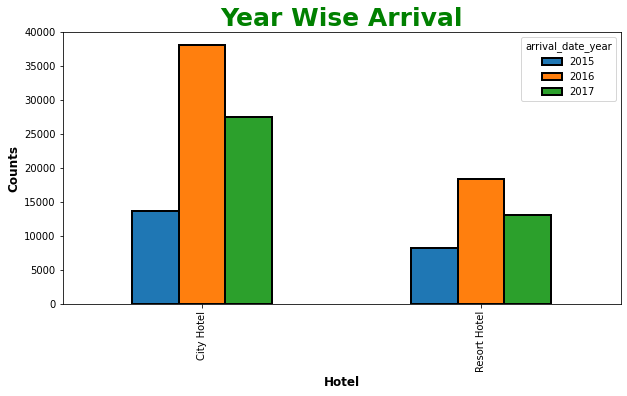

In [ ]:
#plotting the bar chart using matplotlib library for year wise visitors arrival in each type hotel
arrival_list.plot(kind='bar',fontsize=10,edgecolor='black',figsize=(10,5),linewidth=2)
plt.xlabel('Hotel',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12,fontweight='bold')
plt.title('Year Wise Arrival',fontsize=25,fontweight='bold', color='green')

Conclusion:-

most of visitors booked the hotel in both type at 2016 compared to other two year(2015,2017)

##Number of visitors arrival on monthly Basis analysis on each type hotel

In [ ]:
month_wise_arrival_list =['hotel', 'arrival_date_year','arrival_date_month','arrival_date_day_of_month' ]
month_wise_arrival_lists=df[month_wise_arrival_list]


Text(0, 0.5, 'Count')

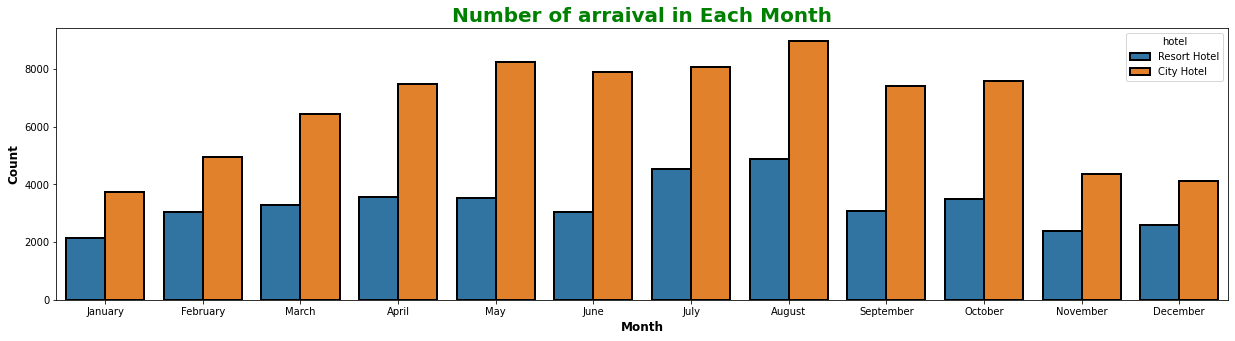

In [ ]:
#plotting the bar chart using seaborn library for number of visistors arrived on each month in each type hotel
plt.figure(figsize=(21,5))

sns.countplot(data = month_wise_arrival_lists, x = 'arrival_date_month',edgecolor='black',hue = 'hotel' ,linewidth=2,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arraival in Each Month',color='Green',fontsize=20,fontweight='bold')
plt.xlabel('Month',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')

Conclusion:-

if we look month wise analysis the most of visitors arrived at may to august month. so its seems to be vacation/summer 

##Number of nights in weekdays

In [ ]:
#count the number of nights stayed by visitors in hotel at weekdays
df['stays_in_week_nights'].value_counts()

2     33574
1     30091
3     22203
5     11051
4      9554
0      7593
6      1491
10     1030
7      1027
8       654
9       231
15       85
11       55
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

Text(0, 0.5, 'Count')

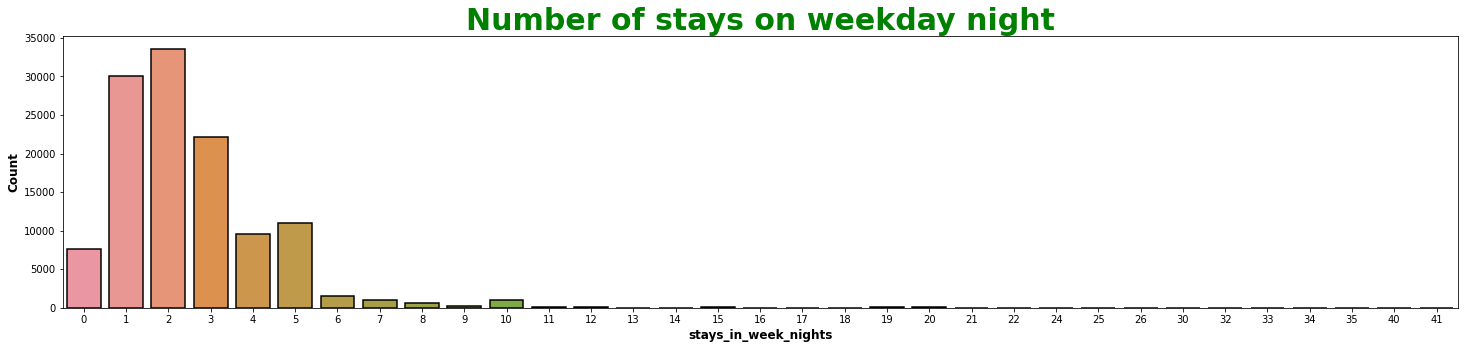

In [ ]:
#use seaborn library we can plot bar chart of number of stays on weekdays_night
plt.figure(figsize=(25,5))
sns.countplot(data=df, x='stays_in_week_nights',edgecolor='black',linewidth=1.5).set_title('Number of stays on weekday night' , fontsize = 30,color='Green',fontweight='bold')
plt.xlabel('stays_in_week_nights',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')

Conclusion:-

Mostly the visitors stays atleast oneday on night during week days. some visitors check-out on same day.

##Number of Stay on Week-End night

In [ ]:
#count the number of nights stayed by visitors in hotel at weekdays
df['stays_in_weekend_nights'].value_counts()

Text(0, 0.5, 'Count')

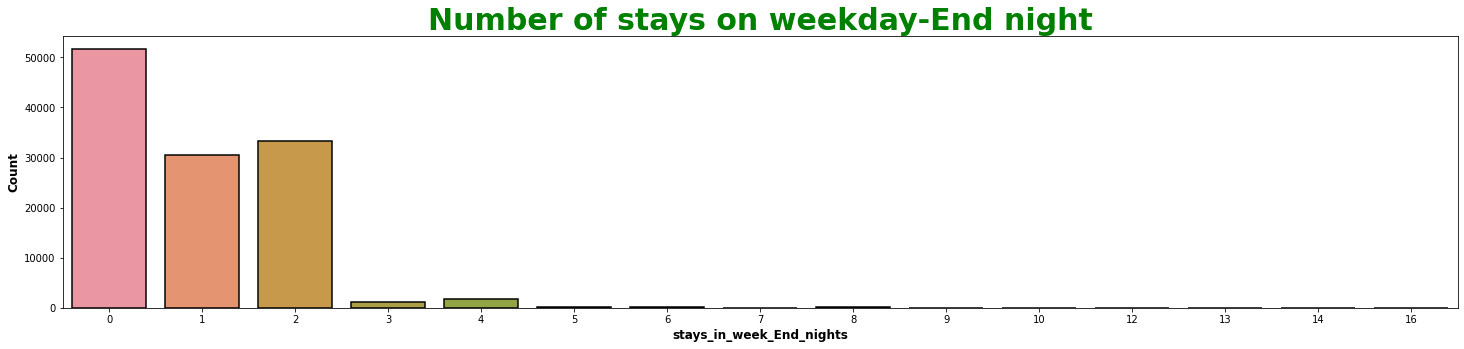

In [ ]:
#use seaborn library we can plot bar chart of number of stays on weekdays_night
plt.figure(figsize=(25,5))
sns.countplot(data=df, x='stays_in_weekend_nights',edgecolor='black',linewidth=1.5).set_title('Number of stays on weekday-End night' , fontsize = 30,color='Green',fontweight='bold')
plt.xlabel('stays_in_week_End_nights',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')

##Checking Visitors come with babies or couple/alone

Text(0, 0.5, 'Counts')

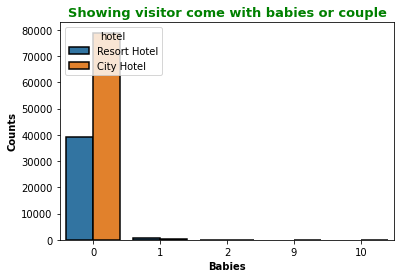

In [ ]:
#Number of arrival with babies in each hotel 
sns.countplot(data = df, x = 'babies',hue = 'hotel',edgecolor='black',linewidth=1.5).set_title("Showing visitor come with babies or couple", fontsize = 13,color='Green',fontweight='bold')
plt.xlabel('Babies',fontsize = 10,fontweight='bold' )
plt.ylabel('Counts',fontsize = 10,fontweight='bold' )

##Conclusion:-
The visitors who come with babies is very less arriaval. mostly visitors come alone or couple only

##Finding the meals Preference by Visitors

In [ ]:
#count unique meals type and its count
meals_preference= df['meal'].value_counts()

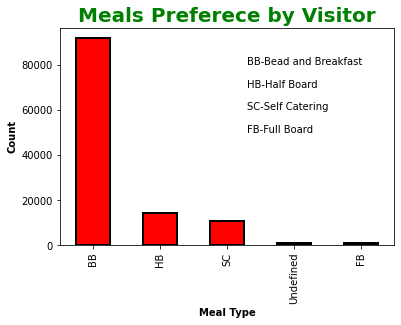

In [ ]:
#plotting the bar chart using matplotlib library for meal preference
meals_preference.plot(kind='bar',color='red', edgecolor='black',linewidth=2)                              
plt.xlabel('Meal Type',fontsize = 10,fontweight='bold' )                                      
plt.ylabel('Count',fontsize = 10,fontweight='bold' )
plt.title('Meals Preferece by Visitor',fontsize = 20,fontweight='bold',color='green' )
plt.text(2.3,80000,'BB-Bead and Breakfast')
plt.text(2.3,70000,'HB-Half Board')
plt.text(2.3,60000,'SC-Self Catering')
plt.text(2.3,50000,'FB-Full Board')
plt.rcParams['figure.figsize']=(7,5)

##Analysis Market segment and distribution channel

In [ ]:
df1=df['market_segment'].value_counts()
df1

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df1=df['market_segment'].value_counts()
df2=df['distribution_channel'].value_counts()
df2

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

<Figure size 432x216 with 0 Axes>

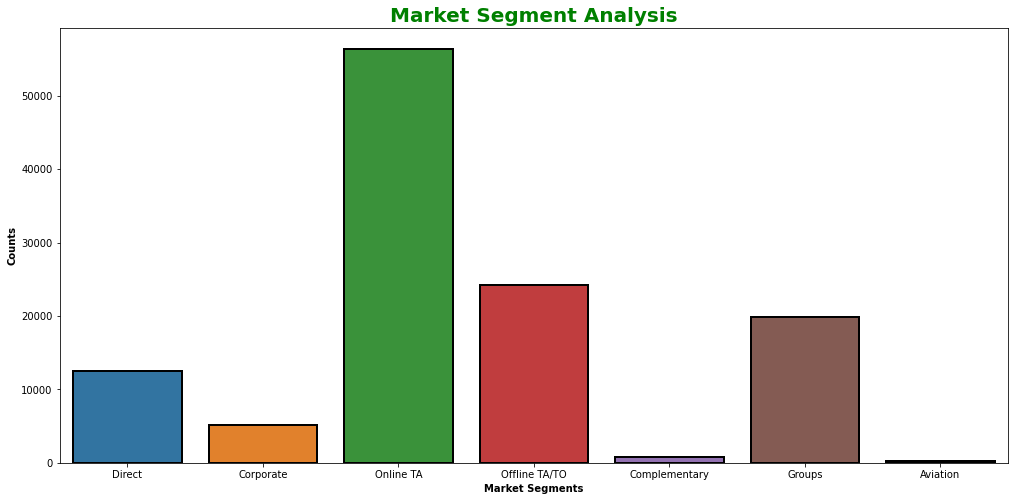

<Figure size 432x216 with 0 Axes>

In [ ]:
#plot market segment for findong each categories
sns.countplot(data=df, x='market_segment',edgecolor='black',linewidth=2).set_title('Market Segment Analysis', color='green',fontsize=20,fontweight='bold')
plt.rcParams['figure.figsize']=(17,8)
plt.xlabel('Market Segments',fontsize = 10,fontweight='bold' )
plt.ylabel('Counts',fontsize = 10,fontweight='bold' )
plt.figure(figsize=(6,3))

Conclusion:
most of the visitor go with Online TA

<Figure size 216x72 with 0 Axes>

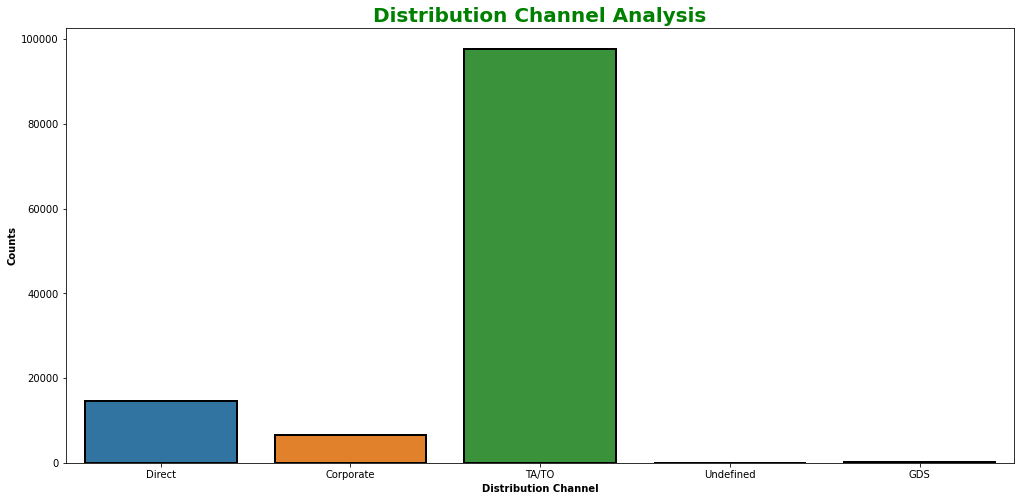

<Figure size 216x72 with 0 Axes>

In [ ]:
#plotting the bar chart using seaborn library for distribution channel analysis during hotel booking
sns.countplot(data=df, x='distribution_channel',edgecolor='black',linewidth=2).set_title('Distribution Channel Analysis', color='green',fontsize=20,fontweight='bold')
plt.rcParams['figure.figsize']=(17,8)
plt.xlabel('Distribution Channel',fontsize = 10,fontweight='bold' )
plt.ylabel('Counts',fontsize = 10,fontweight='bold' )
plt.figure(figsize=(3,1))

##find the busy of the month in hotel booking

Text(0.5, 1.0, 'Busy of the Month')

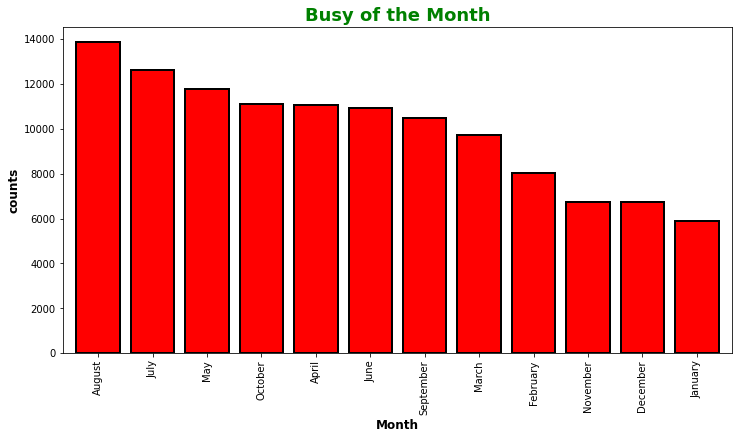

In [ ]:
#plotting the bar chart to find the busy of the month
busy_of_month=df['arrival_date_month'].value_counts()
busy_of_month.plot(kind='bar',width=0.8,linewidth=2,edgecolor='black',figsize = (12,6),fontsize = 10,color='red')
plt.xlabel('Month',fontsize=12,fontweight='bold')
plt.ylabel('counts',fontsize=12,fontweight='bold')
plt.title('Busy of the Month', fontsize=18, fontweight='bold',color='Green')

##Conclusion:-
#from the above bar chart we can conclude that august, july, may month have busy in hotel booking due to may holidays/vacation

##Now plotting the Price in various month in each type hotel

In [ ]:
#create the function for find the price 
def price_calculation (adr, week, weekend):
  price= adr*(week+weekend)
  return price

In [ ]:
# we assume that there is no price ans amount in the table is consider as one nights only
# before going to finding the price we need to create the new dataframe for only consider non-cancallation visiors

non_cancellaction_visitor=df.loc[df["is_canceled"] == 0]
non_cancellaction_visitor['price']=non_cancellaction_visitor.apply(lambda x: price_calculation(x['adr'],x['stays_in_weekend_nights'],x['stays_in_week_nights']),axis=1)
non_cancellaction_visitor

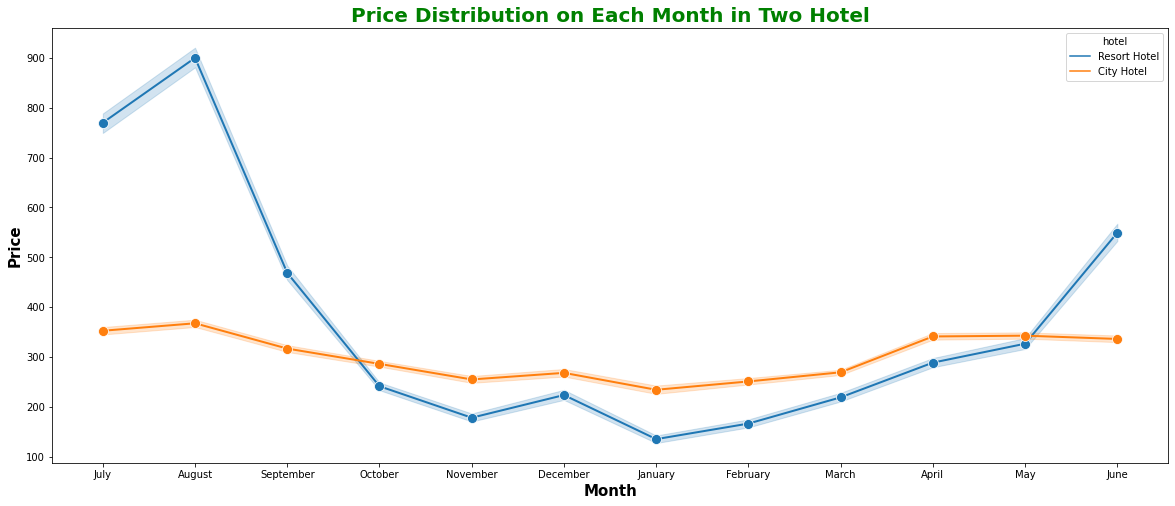

In [ ]:

#with seaborn library plotting the price amount distribution at every month
sns.lineplot(data = non_cancellaction_visitor, x = 'arrival_date_month', y = 'price', hue = 'hotel',marker='o', markersize=10,linewidth=2).set_title('Price Distribution on Each Month in Two Hotel',
                                                                                                               fontsize = 20,fontweight='bold',color='green')
plt.xlabel('Month',fontsize = 15,fontweight='bold' )
plt.ylabel('Price',fontsize = 15,fontweight='bold' )
plt.rcParams['figure.figsize']=(30,8)

##Conclusions:-

From last two graphs on august month visitors visit more in both city and resort  type hotel. that why the above chart says price is high on august month. so our prediction is correct.

##Finding the Deposit analysis

Text(0, 0.5, 'Count')

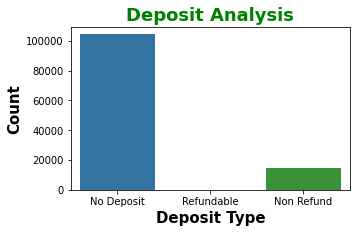

In [ ]:
#using seabirn library plotting and finding the policies which is mostly used by visitors
sns.countplot(data=df, x='deposit_type').set_title('Deposit Analysis',fontsize = 18,fontweight='bold',color='green')
plt.rcParams['figure.figsize']=(3,3)
plt.xlabel('Deposit Type',fontsize = 15,fontweight='bold' )
plt.ylabel('Count',fontsize = 15,fontweight='bold' )

##Conclusion:-
The high value of No depostit tells that most of the booking does not require deposit. That why cancellation rate was actually 50% of non-cancellation rate.

##Finding the top 10 country visitors used the Hotel Booking

In [ ]:
df.groupby(['hotel','country']).hotel.value_counts()

hotel         country  hotel       
City Hotel    ABW      City Hotel        2
              AGO      City Hotel      338
              AIA      City Hotel        1
              ALB      City Hotel        9
              AND      City Hotel        2
                                      ... 
Resort Hotel  VEN      Resort Hotel      3
              VNM      Resort Hotel      2
              ZAF      Resort Hotel     18
              ZMB      Resort Hotel      1
              ZWE      Resort Hotel      2
Name: hotel, Length: 291, dtype: int64

In [ ]:
top_10_countries=df['country'].value_counts()[:10]
top_10_countries

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 Country Visitors')

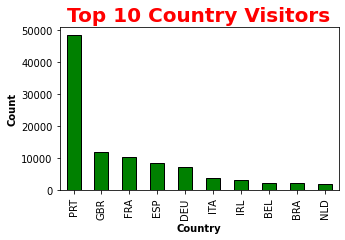

In [ ]:
##plotting the bar chart using matplotlib library to find top 10 countries
top_10_countries.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Country',fontsize = 10,fontweight='bold' )
plt.ylabel('Count',fontsize = 10,fontweight='bold' )
plt.title('Top 10 Country Visitors',fontsize = 20,fontweight='bold',color='red' )

##Finding Number of repeated customer

In [ ]:
df['is_repeated_guest'] = df.is_repeated_guest.replace([1,0], ['Repeated', 'Non_Repeated'])

In [ ]:
repeated_customers=df['is_repeated_guest'].value_counts()
repeated_customers

Non_Repeated    115092
Repeated          3806
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Customer Type Analysis')

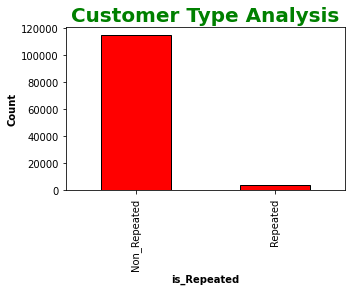

In [ ]:
#plotting the bar chart using matplotlib library to find whether customer is arrived again or not
repeated_customers.plot(kind='bar',color='red', edgecolor='black')
plt.xlabel('is_Repeated',fontsize = 10,fontweight='bold' )
plt.ylabel('Count',fontsize = 10,fontweight='bold' )
plt.title('Customer Type Analysis',fontsize = 20,fontweight='bold',color='green' )


In [ ]:
country_visitors = non_cancellaction_visitor.groupby(['country']).size().reset_index(name = 'count')   
# by taking reference from kaggle analysis

# with help of  Plotly.express to plot a choropleth map.
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

**SUMMARY OF THE PROJECT**


1.  From the first pie chart majority of hotel booked in City based hotel.
2.  the reason for  high rate of cancellations is  no deposit policies.
3.  More number of arrival will be may to August, may be summer/vacation period
4.  Western Europe are majority visitors in hotel booking
5.  Nov to Jan Month is least price for hotel
6.  Most of the people preferred by BB type meal
7.  final conclusion is majority of visitors are non repeated customers. may be hotel is not meet with visitor requirement or else we need some advertisement/discount for bring the visitors back





